<a href="https://colab.research.google.com/github/mtsilimos/Codesnippets_Sentence-Embeddings-for-the-Classification-of-Explicit-Fine-grained-Discourse-Relations/blob/main/Bi_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import tensorflow as tf
seed = 42
tf.random.set_seed(seed)

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
import pandas as pd

df = pd.read_csv('/content/drive/My Drive/finalcorpus.csv', ';', encoding= 'unicode_escape')

df['text'].head()

<ipython-input-32-e599d8470047>:3: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  df = pd.read_csv('/content/drive/My Drive/finalcorpus.csv', ';', encoding= 'unicode_escape')


0    Once she asked for daddy, but went back to sle...
1    The medication they were giving her to clear u...
2        You can sit up, but you have to stay in there
3    She met his gaze defiantly for a moment longer...
4    If it's something we simply can't afford, that...
Name: text, dtype: object

In [33]:

X = df['text']
y = df['label']

In [35]:
vocab_size= 20000
from tensorflow.keras.preprocessing.text import one_hot
encoding = [one_hot(d,vocab_size) for d in df['text']]

In [36]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
emb_doc = pad_sequences(encoding,padding='pre',maxlen=50)

In [37]:
import numpy as np
final_x = np.array(emb_doc)
final_y = np.array(y)

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional

model = Sequential()
model.add(Embedding(vocab_size, output_dim=32, input_length=50))
model.add(Bidirectional(LSTM(20)))
model.add(Dense(6,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer= 'adam', metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 50, 32)            640000    
                                                                 
 bidirectional_2 (Bidirecti  (None, 40)                8480      
 onal)                                                           
                                                                 
 dense_6 (Dense)             (None, 6)                 246       
                                                                 
 dense_7 (Dense)             (None, 4)                 28        
                                                                 
 dense_8 (Dense)             (None, 1)                 5         
                                                                 
Total params: 648759 (2.47 MB)
Trainable params: 648759 (2.47 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [39]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(final_x, final_y, test_size=0.20, random_state=42)
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), shuffle =  True, epochs=10, batch_size=64)

Epoch 1/10
25/25 [==============================] - 11s 199ms/step - loss: 0.6902 - accuracy: 0.5069 - val_loss: 0.6827 - val_accuracy: 0.6025
Epoch 2/10
25/25 [==============================] - 3s 102ms/step - loss: 0.6513 - accuracy: 0.7050 - val_loss: 0.6027 - val_accuracy: 0.7725
Epoch 3/10
25/25 [==============================] - 2s 88ms/step - loss: 0.4676 - accuracy: 0.8662 - val_loss: 0.4279 - val_accuracy: 0.8900
Epoch 4/10
25/25 [==============================] - 3s 108ms/step - loss: 0.2436 - accuracy: 0.9538 - val_loss: 0.3475 - val_accuracy: 0.8700
Epoch 5/10
25/25 [==============================] - 2s 81ms/step - loss: 0.1001 - accuracy: 0.9819 - val_loss: 0.3404 - val_accuracy: 0.8675
Epoch 6/10
25/25 [==============================] - 1s 51ms/step - loss: 0.0462 - accuracy: 0.9962 - val_loss: 0.3471 - val_accuracy: 0.8925
Epoch 7/10
25/25 [==============================] - 1s 32ms/step - loss: 0.0234 - accuracy: 0.9981 - val_loss: 0.3912 - val_accuracy: 0.8750
Epoch 8/1

In [40]:
model.evaluate(x_test, y_test)

13/13 [==============================] - 0s 5ms/step - loss: 0.4717 - accuracy: 0.8875


[0.4716744124889374, 0.887499988079071]

In [41]:
model.evaluate(x_train, y_train)

50/50 [==============================] - 0s 9ms/step - loss: 0.0049 - accuracy: 1.0000


[0.004918309859931469, 1.0]

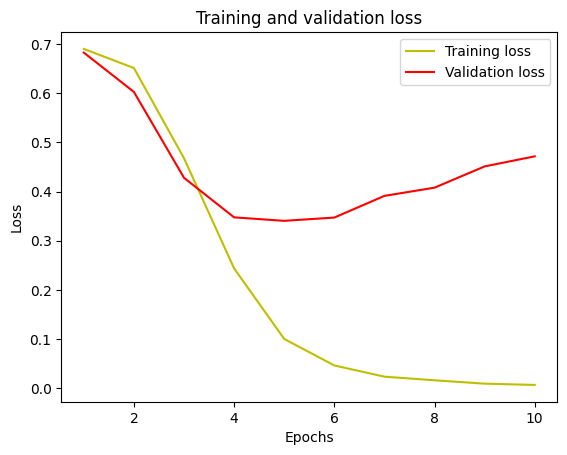

In [42]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

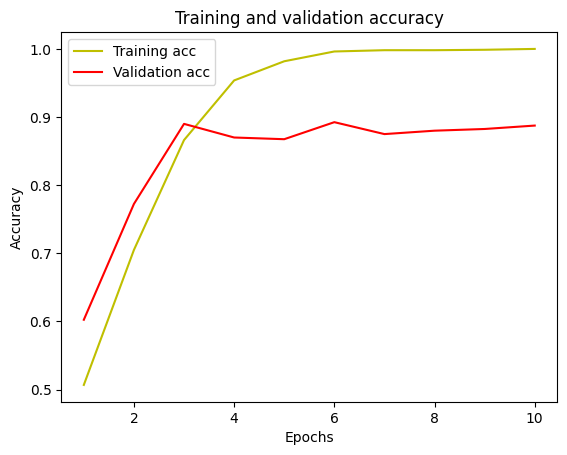

In [43]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()